In [ ]:
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

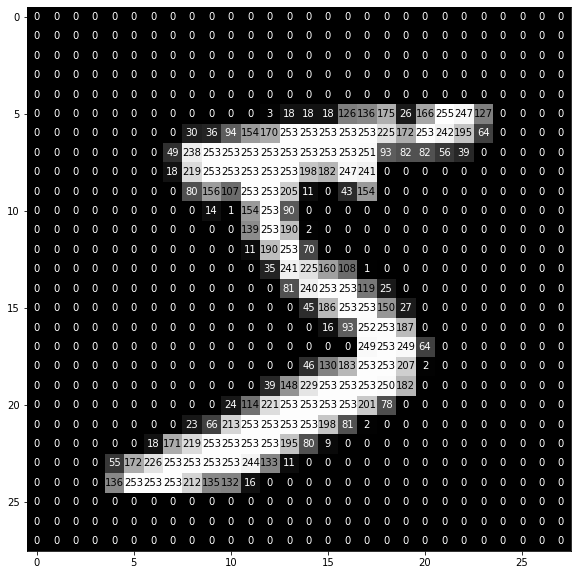

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0],ax )
plt.show()

In [ ]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


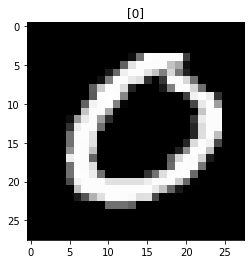

In [ ]:
# lets see some random images and its labels
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])
plt.show()

In [ ]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255


In [ ]:
# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28),)) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2319 - accuracy: 0.9315 - val_loss: 0.1240 - val_accuracy: 0.9631
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0947 - accuracy: 0.9726 - val_loss: 0.0979 - val_accuracy: 0.9701
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0607 - accuracy: 0.9821 - val_loss: 0.0935 - val_accuracy: 0.9728
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0411 - accuracy: 0.9878 - val_loss: 0.0868 - val_accuracy: 0.9739
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0782 - val_accuracy: 0.9777
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0791 - val_accuracy: 0.9772
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.0950 - val_accuracy:

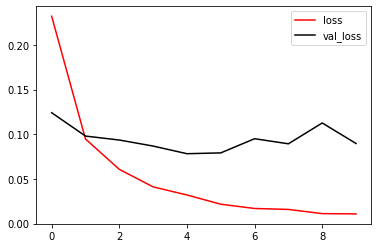

In [ ]:
import matplotlib.pyplot as plt
plt.plot((history.history['loss']),color='red',label='loss')
plt.plot((history.history['val_loss']),color='black',label='val_loss')
plt.legend()
plt.show()

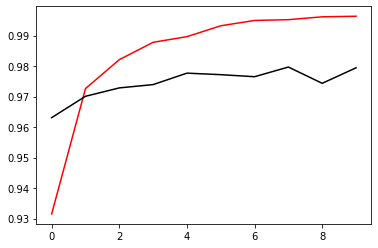

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy',color='red')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color='black')

In [ ]:
# Evaluate on test data

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from keras.preprocessing import image

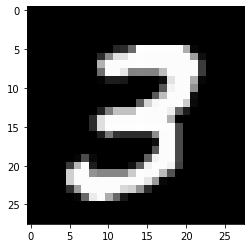

In [ ]:
img = image.load_img(path="/content/MNIST_digit.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [ ]:
prediction

3

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.9803

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 970,    0,    2,    1,    2,    1,    1,    2,    3,    2],
       [   1, 1122,    0,    0,    0,    0,    3,    0,    0,    2],
       [   1,    2, 1015,    1,    1,    0,    0,    9,    3,    0],
       [   1,    4,    2,  995,    1,    8,    1,    5,    5,    5],
       [   1,    0,    1,    0,  947,    0,    1,    0,    0,    6],
       [   1,    0,    1,    3,    0,  873,    3,    0,    6,    7],
       [   3,    2,    2,    0,   14,    5,  948,    0,    2,    0],
       [   0,    3,    6,    2,    2,    0,    0, 1005,    3,    6],
       [   1,    2,    3,    3,    3,    2,    1,    5,  949,    2],
       [   1,    0,    0,    5,   12,    3,    0,    2,    3,  979]])

In [ ]:
model.save("mnist.hdf5")